In [1]:
import spotipy
import spotipy.util as util
import pandas as pd 
import csv 
import matplotlib.pyplot as plt
import seaborn as sns 

token = util.prompt_for_user_token(
        username="1216881844",
        scope='playlist-modify-public',
        client_id="e140e3727440411da49853bba10435b6",
        client_secret="3cad2acf3ec64226aa56928372effd1f",
        redirect_uri="http://localhost:8888") 

sp = spotipy.Spotify(auth=token) 

In [2]:
# File to Load
file_to_load = "top2018.csv"
# Read File and store into Pandas data frame
top100_df = pd.read_csv(file_to_load)
top100_df.head()




,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


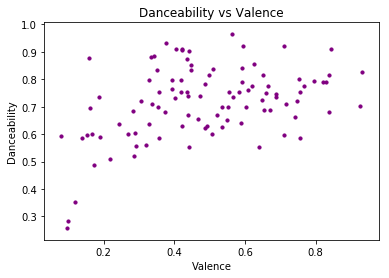

In [3]:
#Plot correlation
#Violin Plot
#linear model? 
#overfitting 
#Genre (barchart)
# Build a scatter plot for each data type
plt.scatter(top100_df["valence"], top100_df["danceability"], color="purple", marker="o", s=10)

# Incorporate the other graph properties
plt.title("Danceability vs Valence") 
plt.ylabel("Danceability")
plt.xlabel("Valence")
plt.grid(False) 

C:\Users\kramsey\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


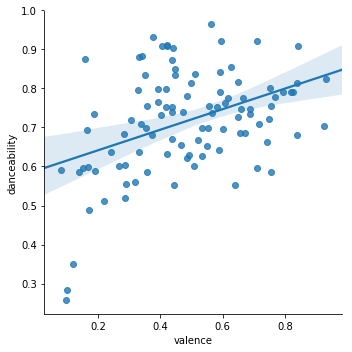

In [4]:
sns.lmplot(x='valence',y='danceability',data=top100_df,fit_reg=True) 

In [5]:
tracks = ["61T2H6w0ggQdhCvVegLl99", "35ieKju5aLWFN5UgfJ27mL", "1OmcAT5Y8eg5bUPv9qJT4R", "65NwOZqoXny4JxqAPlfxRF", "2G7V7zsVDxg1yRsu7Ew9RJ", "7dt6x5M1jzdTEt8oCbisTK", "285jK9VYQKmijjcrjD4CRa", "7ef4DlsgrMEH11cDZd32M6", "08bNPGLD8AhKpnnERrAc6G", "0ofbQMrRDsUaVKq2mGLEAb"]
trackid = ["God's Plan", "Sad!", "Rockstar", "Psycho", "In My Feelings", "Better Now", "I Like It", "One Kiss", "Friends", "Havana"]
data = sp.audio_features(tracks)
data

[{'danceability': 0.758,
  'energy': 0.451,
  'key': 7,
  'loudness': -9.454,
  'mode': 1,
  'speechiness': 0.104,
  'acousticness': 0.0273,
  'instrumentalness': 9.48e-05,
  'liveness': 0.566,
  'valence': 0.353,
  'tempo': 77.175,
  'type': 'audio_features',
  'id': '61T2H6w0ggQdhCvVegLl99',
  'uri': 'spotify:track:61T2H6w0ggQdhCvVegLl99',
  'track_href': 'https://api.spotify.com/v1/tracks/61T2H6w0ggQdhCvVegLl99',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/61T2H6w0ggQdhCvVegLl99',
  'duration_ms': 198960,
  'time_signature': 4},
 {'danceability': 0.74,
  'energy': 0.613,
  'key': 8,
  'loudness': -4.88,
  'mode': 1,
  'speechiness': 0.145,
  'acousticness': 0.258,
  'instrumentalness': 0.00372,
  'liveness': 0.123,
  'valence': 0.473,
  'tempo': 75.023,
  'type': 'audio_features',
  'id': '35ieKju5aLWFN5UgfJ27mL',
  'uri': 'spotify:track:35ieKju5aLWFN5UgfJ27mL',
  'track_href': 'https://api.spotify.com/v1/tracks/35ieKju5aLWFN5UgfJ27mL',
  'analysis_url': 'https://ap

In [6]:
top10df = pd.DataFrame({"Song Name":trackid})
top10df.head() 

,Song Name
0,God's Plan
1,Sad!
2,Rockstar
3,Psycho
4,In My Feelings


In [7]:
for index, row in top10df.iterrows():
    top10df.loc[index, "Energy"] = data[index]["energy"]
    top10df.loc[index, "Liveness"] = data[index]["liveness"]
    top10df.loc[index, "Tempo"] = data[index]["tempo"]
    top10df.loc[index, "Valence"] = data[index]["valence"]
    top10df.loc[index, "Loudness"] = data[index]["loudness"]
    top10df.loc[index, "Speechiness"] = data[index]["speechiness"]
    top10df.loc[index, "Acousticness"] = data[index]["acousticness"]
    top10df.loc[index, "Danceability"] = data[index]["danceability"]
    top10df.loc[index, "Instrumentalness"] = data[index]["instrumentalness"]

In [8]:
top10df 

,Song Name,Energy,Liveness,Tempo,Valence,Loudness,Speechiness,Acousticness,Danceability,Instrumentalness
0,God's Plan,0.451,0.5660,77.175,0.353,-9.454,0.1040,0.0273,0.758,0.000095
1,Sad!,0.613,0.1230,75.023,0.473,-4.880,0.1450,0.2580,0.740,0.003720
2,Rockstar,0.531,0.1430,159.786,0.141,-6.631,0.0776,0.1280,0.580,0.000127
3,Psycho,0.558,0.1120,140.057,0.421,-8.115,0.1020,0.5660,0.740,0.000000
4,In My Feelings,0.626,0.3960,91.030,0.350,-5.833,0.1250,0.0589,0.835,0.000060
5,Better Now,0.563,0.1360,145.028,0.374,-5.843,0.0454,0.3540,0.680,0.000000
6,I Like It,0.726,0.3720,136.048,0.650,-3.998,0.1290,0.0990,0.816,0.000000
7,One Kiss,0.862,0.0814,123.994,0.592,-3.240,0.1100,0.0370,0.791,0.000022
8,Friends,0.880,0.1280,95.079,0.534,-2.384,0.0504,0.2050,0.626,0.000000
9,Havana,0.517,0.1040,104.992,0.418,-4.323,0.0312,0.1860,0.768,0.000038
